In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize, stats
from pybaselines import Baseline, utils

In [2]:
def peak(x, amp, mu, sigma):
    return amp * np.exp(-((x - mu) / (np.sqrt(2) * sigma))**2)
    
def model(x, amp1, mu1, sigma1, amp2, mu2, sigma2):
    return peak(x, amp1, mu1, sigma1) + peak(x, amp2, mu2, sigma2)

In [3]:
p0 = (78, 810, 20, 8, 940, 20)

In [4]:
np.random.seed(12345)

In [5]:
x = np.linspace(500, 1250, 300)
y = model(x, *p0)
n = stats.gamma.rvs(a=1, size=y.size)
baseline = peak(x, 10, 850, 100)
yn = y + n + baseline

In [20]:
fitter = Baseline(x)
background = fitter.noise_median(yn)[0]

In [21]:
ynb = yn - background

In [26]:
popt, pcov = optimize.curve_fit(
    model, x, ynb, p0=(100, 800, 10, 10, 950, 10)
)

In [27]:
popt

array([ 76.67294408, 809.77512767,  19.34811642,   6.73245135,
       940.23157546,  13.70532014])

In [28]:
yhat = model(x, *popt)

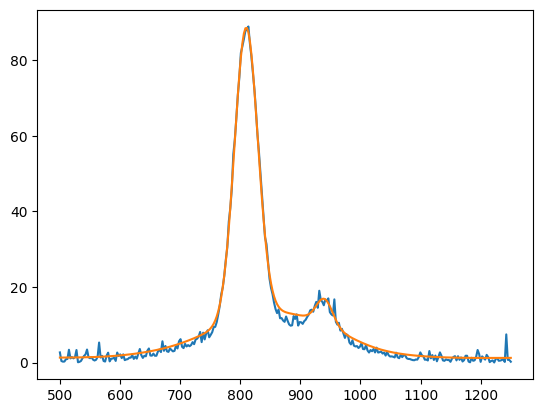

In [29]:
fig, axe = plt.subplots()
axe.plot(x, yn)
axe.plot(x, yhat + background)